In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
import geopandas as gpd
soa_shape_map_path = r"Data-New/UAE_habitats_new1.shp"
soa_shape_map = gpd.read_file(soa_shape_map_path)

# soa_shape_map_geo = soa_shape_map.to_crs(epsg=4326, inplace=True)
# print(soa_shape_map_geo.iloc[0].geometry.centroid.y, soa_shape_map_geo.iloc[0].geometry.centroid.x)

<AxesSubplot:>

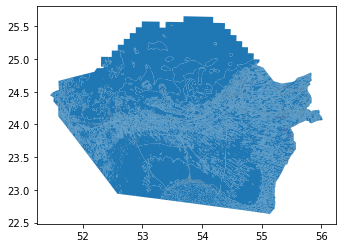

In [3]:
soa_shape_map.plot()

In [4]:
from shapely.geometry.collection import GeometryCollection

# set the null geometries to be empty geometryCollections to avoid error
soa_shape_map['geometry'] = soa_shape_map.geometry.apply(lambda x: x if x else GeometryCollection())


soa_shape_map_geo = soa_shape_map.to_crs({'init': 'epsg:4326'})

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
soa_shape_map_geo

,OBJECTID,Id,HabitatTyp,HabitatT_1,HabitatSub,HabitatS_1,RuleID,Shape_Leng,Shape_Area,Habitats,geometry
0,1,1,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,7.524321e+03,2.115300e+06,Intertidal Habitats,"POLYGON ((53.99011 24.13066, 53.99039 24.13065..."
1,2,2,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,4.870493e+04,7.777595e+06,Intertidal Habitats,"POLYGON ((54.07207 24.15920, 54.07776 24.15455..."
2,3,3,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,2.721521e+03,1.367130e+05,Intertidal Habitats,"POLYGON ((54.10483 24.16618, 54.10465 24.16584..."
3,4,4,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,1.001023e+04,1.424318e+06,Intertidal Habitats,"POLYGON ((54.03827 24.17414, 54.03834 24.17400..."
4,5,5,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,6.023903e+04,1.222009e+07,Intertidal Habitats,"POLYGON ((54.17323 24.19203, 54.17294 24.19172..."
...,...,...,...,...,...,...,...,...,...,...,...
68407,68408,27749,17000,Deep Sub-Tidal Seabed,17000,Deep Sub-Tidal Seabed,13,6.779433e+03,2.321405e+06,Deep Sub-Tidal Seabed,"POLYGON ((51.86066 24.64255, 51.85864 24.64164..."
68408,68409,27750,17000,Deep Sub-Tidal Seabed,17000,Deep Sub-Tidal Seabed,13,2.949082e+03,4.308493e+05,Deep Sub-Tidal Seabed,"POLYGON ((51.78022 24.68265, 51.78028 24.68244..."
68409,68410,27751,17000,Deep Sub-Tidal Seabed,17000,Deep Sub-Tidal Seabed,13,8.547824e+04,4.761868e+07,Deep Sub-Tidal Seabed,"POLYGON ((51.68765 24.67259, 51.68587 24.67217..."
68410,68411,27752,17000,Deep Sub-Tidal Seabed,17000,Deep Sub-Tidal Seabed,13,1.392197e+05,1.043467e+08,Deep Sub-Tidal Seabed,"POLYGON ((51.82734 24.71405, 51.82756 24.71068..."


In [6]:
type(soa_shape_map_geo)

geopandas.geodataframe.GeoDataFrame

In [7]:
print(soa_shape_map_geo.iloc[0].geometry.centroid.y, soa_shape_map_geo.iloc[0].geometry.centroid.x)

24.12542566442906 53.99526467366637


In [8]:
unique_habitats = soa_shape_map_geo['HabitatT_1'].unique()
print(unique_habitats)
print(len(unique_habitats))

['Intertidal Habitats' 'Coastal Plains, Sand Sheets And Low Dunes'
 'Urban, Industrial And Commercial Habitat Types' 'Sand Sheets And Dunes'
 'Coastal Sabkha, Including Sabkha Matti'
 'Gravel Plains (Alluvial And Interdunal)'
 'Mountains, Rocky Terrain And Wadis'
 'Inland Standing Water Habitats And Habitats Of Moist Ground'
 'Oases, Farmland And Forestry' 'Coral Reef' 'Seagrass Bed' 'Hard-Bottom'
 'Unconsolidated Bottom' 'Marine Construction' 'Dredged Areas'
 'Deep Sub-Tidal Seabed']
16


In [9]:
unique_habitats2 = soa_shape_map_geo['Habitats'].unique()
print(unique_habitats2)
print(len(unique_habitats2))

['Intertidal Habitats' 'Saltmarsh' 'Mangroves' 'Sandy Beaches'
 'Coastal Sand Plains' 'Developed' 'Coastal Rocky Plains'
 'Sand Sheets and Dunes' 'Coastal Cliff' 'Coastal Salt Flats' 'Mega Dunes'
 'Gravel Plains' 'Inland Salt Flats' 'Mountains'
 'Lakes or Artificial Lakes' 'Wetlands' 'Forest Plantations' 'Farmland'
 'Rocky Beaches' 'Coral Reefs' 'Seagrass Bed' 'Hard-Bottom'
 'Unconsolidated Bottom' 'Marine Structure' 'Dredged Seabed'
 'Dredged Area Wall' 'Deep Sub-Tidal Seabed']
27


# Distribution Table

In [10]:
# Distribution Table
d_table = pd.value_counts(soa_shape_map_geo['Habitats']).to_frame(name='Frequency')
d_table = d_table.reset_index()
d_table = d_table.rename(columns={'index': 'Habitat Type'})
d_table

,Habitat Type,Frequency
0,Farmland,16494
1,Hard-Bottom,9995
2,Developed,7113
3,Unconsolidated Bottom,6641
4,Forest Plantations,5557
5,Seagrass Bed,4967
6,Coral Reefs,4673
7,Sand Sheets and Dunes,4463
8,Gravel Plains,2682
9,Mountains,1067


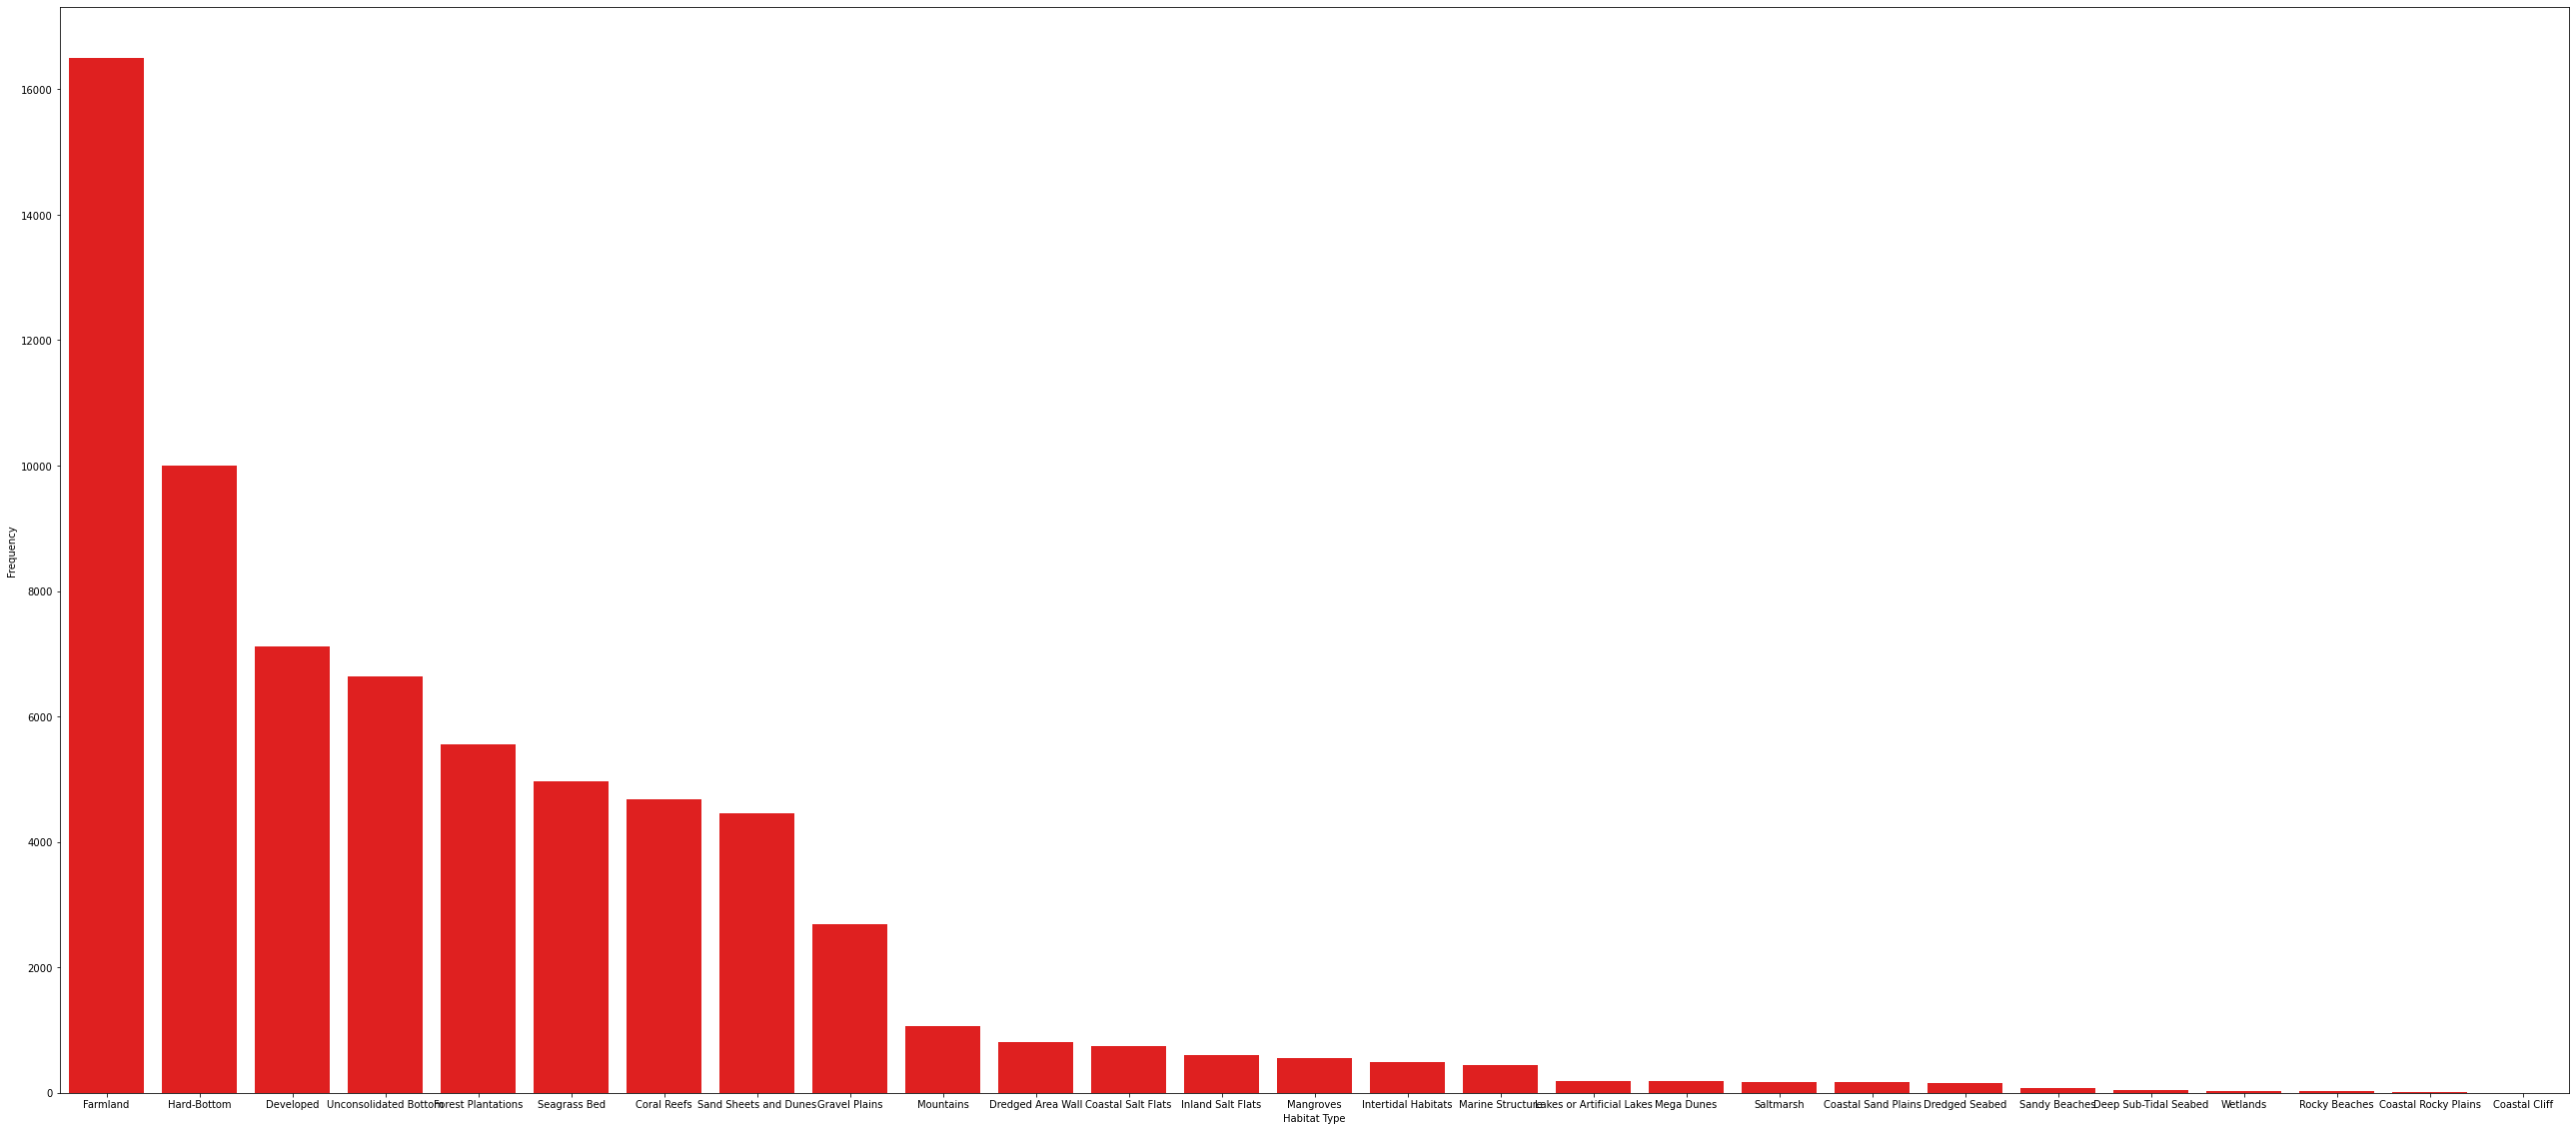

In [11]:
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(x="Habitat Type", y="Frequency", data=d_table, label="Habitat Type Distribution Table", ax=ax, color='red')

fig = plt.gcf()
fig.set_size_inches(45, 20)

# Plot

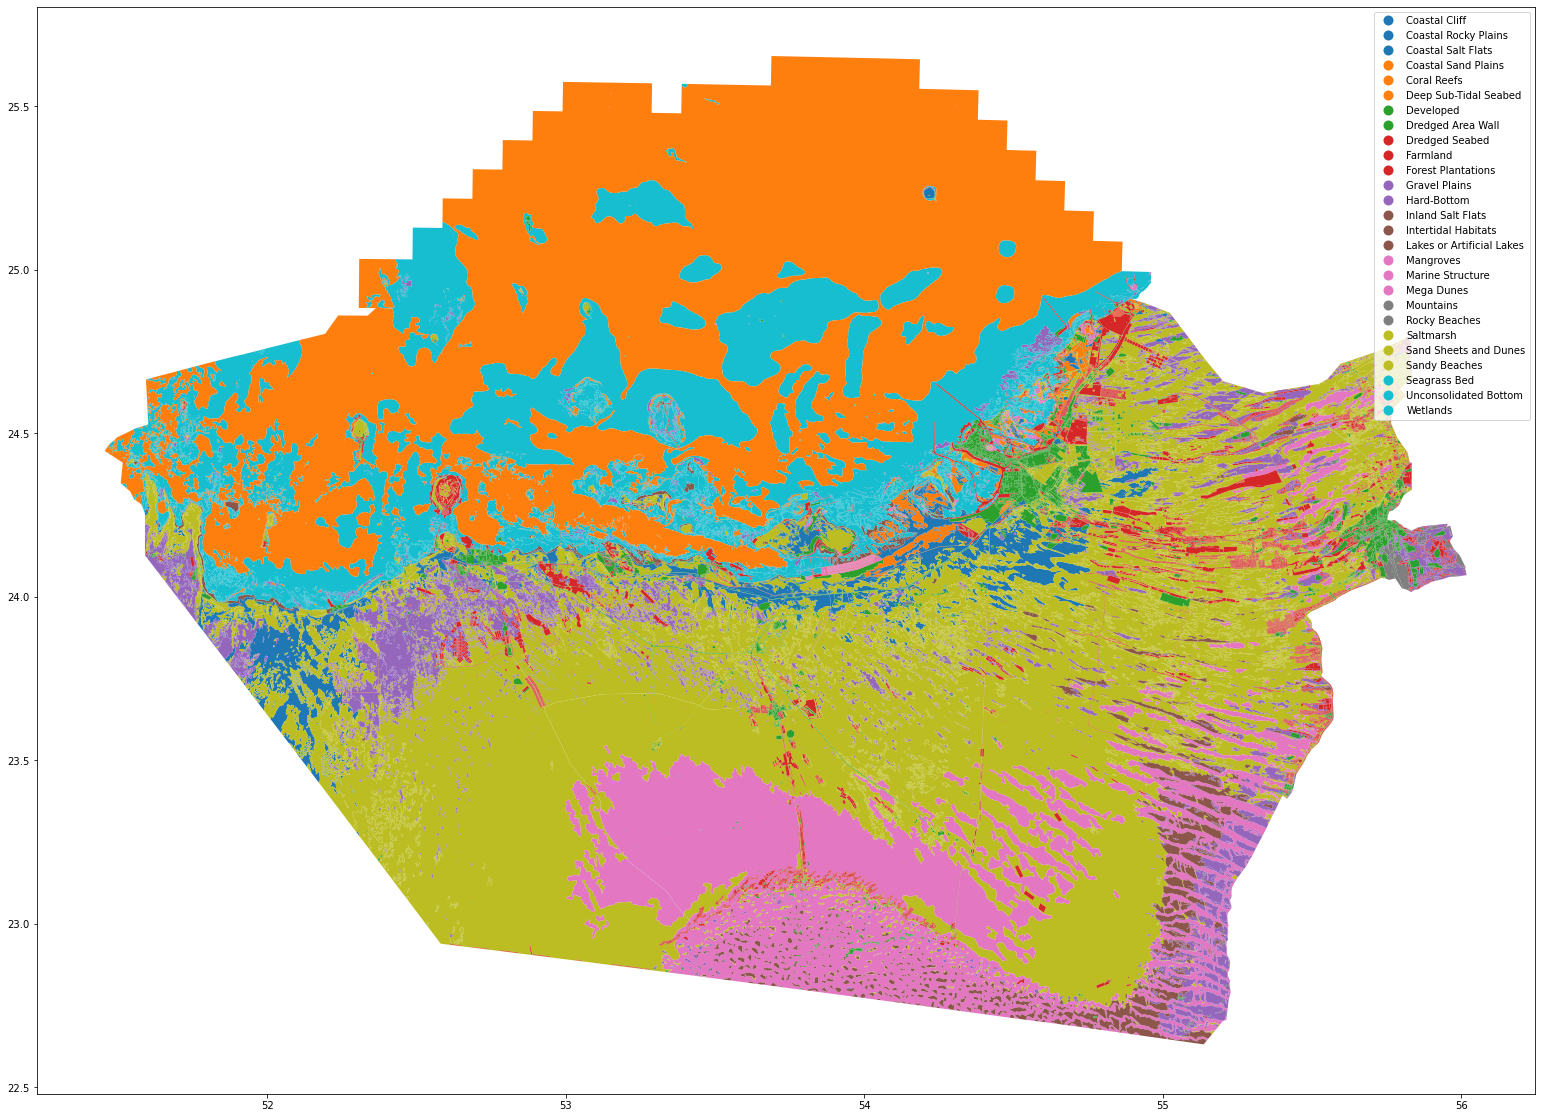

In [12]:
soa_shape_map.plot(column='Habitats', legend='True')
fig = plt.gcf()
fig.set_size_inches(45, 20)

In [ ]:
# Attempting to add north arrow and scalebar to map:
my_m = soa_shape_map.plot(column='Habitats', legend='True')

In [ ]:
from geemap import cartoee
# import cartopy.crs as ccrs

In [16]:
# could not install cartopy therefore could not execute code
region = [123.3,-8.5,123.8,-8.18]
vis = {'min': 0, 'max': 6000, 'bands': ['B4', 'B3', 'B2']}
ax = cartoee.get_map(my_m, region=region, vis_params=vis)

cartoee.add_scale_bar(ax, 5, xy=(0.9, 0.02), linewidth=3, color="white", unit="km")
cartoee.add_north_arrow(ax, 'N', xy=(0.9, 0.2), arrow_length=0.1, text_color="white", arrow_color="white")

NameError: name 'ccrs' is not defined

# Randoms:

In [17]:
from osgeo import osr, gdal
import georasters as gr

In [18]:
elevation_t = gr.from_file('Data-Old/Elevation.tif')
elevation_df = elevation_t.to_pandas()

vlm_d = pd.read_excel('Data-Old/data_analisis.xls')
slr_d = pd.read_excel('Data-Old/SLR-A.xls', skiprows=15)
slr_d_new = slr_d[['Latitude', 'Longitude', 'Scenario', 'Background RSL rate (mm/yr)', 'RSL in 2030 (cm)'
              , 'RSL in 2050 (cm)', 'RSL in 2080 (cm)', 'RSL in 2100 (cm)']]

In [19]:
min_latitude, min_longitude = min(vlm_d.Latitude), min(vlm_d.Longitude)
max_latitude, max_longitude = max(vlm_d.Latitude), max(vlm_d.Longitude)

In [20]:
grid_x, grid_y = np.mgrid[min_longitude:max_longitude:100j, min_latitude:max_latitude:200j]

vlm_points = vlm_d[['Longitude', 'Latitude']].values
vlm_values = vlm_d.VLM.values

In [21]:
coordinates = elevation_df[['x', 'y']].values

In [22]:
from scipy.interpolate import griddata

# grid_z2 = griddata(vlm_points, vlm_values, (grid_x, grid_y), method='cubic')
grid_z2 = griddata(vlm_points, vlm_values, coordinates, method='cubic')

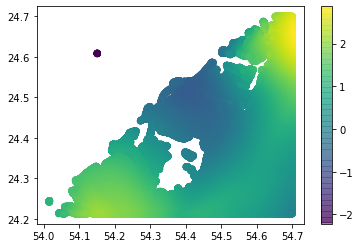

In [23]:
plt.scatter(elevation_df.x, elevation_df.y, alpha=0.5, c=grid_z2)
plt.colorbar()

<AxesSubplot:>

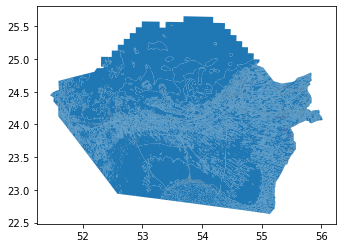

In [24]:
soa_shape_map_geo_new = soa_shape_map_geo

soa_shape_map_geo_new['Longitude'] = elevation_df['y']
soa_shape_map_geo_new['Latitude'] = elevation_df['x']


soa_shape_map_geo_new.plot()

In [25]:
soa_shape_map_geo_new.head()

,OBJECTID,Id,HabitatTyp,HabitatT_1,HabitatSub,HabitatS_1,RuleID,Shape_Leng,Shape_Area,Habitats,geometry,Longitude,Latitude
0,1,1,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,7524.321019,2.115300e+06,Intertidal Habitats,"POLYGON ((53.99011 24.13066, 53.99039 24.13065...",24.700139,54.651806
1,2,2,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,48704.931412,7.777595e+06,Intertidal Habitats,"POLYGON ((54.07207 24.15920, 54.07776 24.15455...",24.700139,54.652084
2,3,3,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,2721.521261,1.367130e+05,Intertidal Habitats,"POLYGON ((54.10483 24.16618, 54.10465 24.16584...",24.700139,54.652361
3,4,4,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,10010.231740,1.424318e+06,Intertidal Habitats,"POLYGON ((54.03827 24.17414, 54.03834 24.17400...",24.700139,54.652639
4,5,5,1000,Intertidal Habitats,1010,Mudflats And Sand Exposed At Low Tide,14,60239.031422,1.222009e+07,Intertidal Habitats,"POLYGON ((54.17323 24.19203, 54.17294 24.19172...",24.700139,54.652917


In [26]:
length = len(soa_shape_map_geo_new)

In [27]:
# to avoid error: grid_z2 is bigger than size of soa_shape_map_geo_new
grid_z2 = grid_z2[:length]

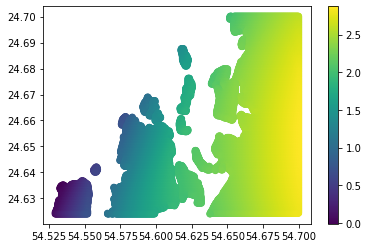

In [28]:
plt.scatter(soa_shape_map_geo_new.Latitude, soa_shape_map_geo_new.Longitude, c=grid_z2)
plt.colorbar()

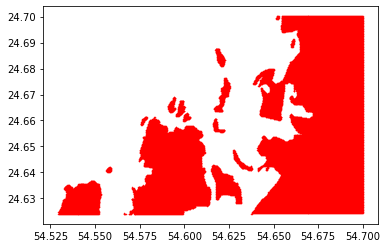

In [29]:
plt.plot(soa_shape_map_geo_new.Latitude, soa_shape_map_geo_new.Longitude, 'r.', ms=1)